## **Лабораторная №1 ТМО. Попов М.А. ИУ5-65Б**

### **Разведочный анализ данных. Исследование и визуализация данных.**

#### **1) Текстовое описание набора данных**

В качестве набора данных используется набор данных для прогнозирования возраста морского ушка (разновидность моллюсков) на основе физических измерений - [Источник](https://archive.ics.uci.edu/ml/datasets/Abalone)

Эта задача является актуально, так как определение возраста по кольцам это - трудоемкий и долгий процесс.

Датасет состоит из одного файла abalone_ds.txt

В файле содержатся следующие колонки:


*   Sex - пол особи: мужской(М), женский (F), ребенок(I)
*   Length - длина особи
*   Diameter - ширина особи
*   Height - высота особи
*   Whole weight - вес всей особи
*   Shucked weight - вес мяса особи
*   Viscera weight - вес кишечника особи
*   Shell weight - вес раковины особи
*   Rings - количество колец особи, +1.5 дает возраст в годах


### **Импорт библиотек**

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 
sns.set(style="ticks")

### **Загрузка данных**

In [36]:
uploaded = files.upload()

Saving abalone_ds.txt to abalone_ds.txt


In [37]:
data = pd.read_csv('abalone_ds.txt', sep=",")

#### **2) Основные характеристики датасета**

Первые пять строк датасета

In [38]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Размер датасета (кол-во строк, кол-во колонок)

In [39]:
data.shape

(4177, 9)

In [40]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4177


Список колонок

In [41]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Список колонок с типами данных

In [42]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Проверка на наличие пустых значений

In [43]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Sex - 0
Length - 0
Diameter - 0
Height - 0
Whole weight - 0
Shucked weight - 0
Viscera weight - 0
Shell weight - 0
Rings - 0


Основные статистические характеристики датасета

In [44]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Уникальные значения для целевого признака

In [45]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

### **3)Визуальное исследование датасета**

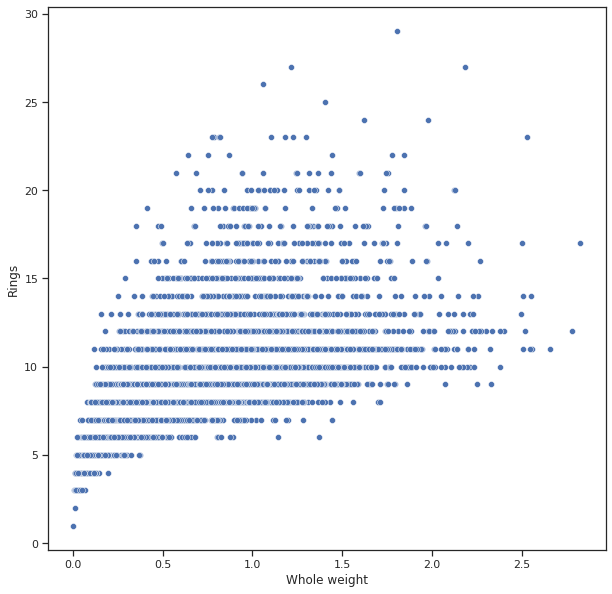

In [47]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Whole weight', y='Rings', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


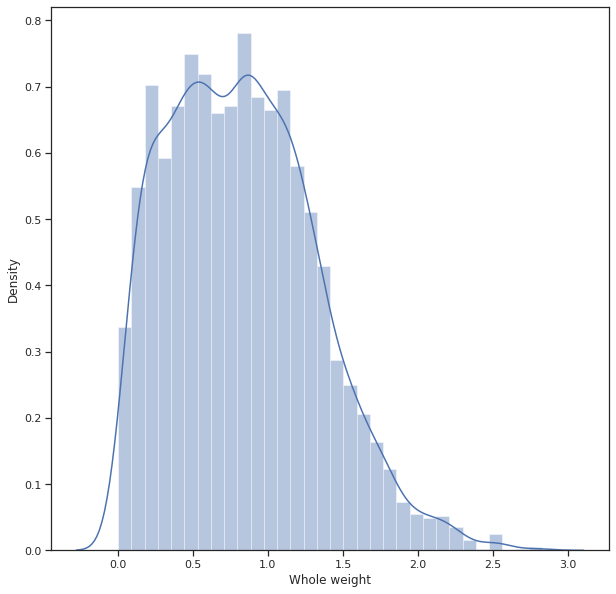

In [50]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Whole weight'])

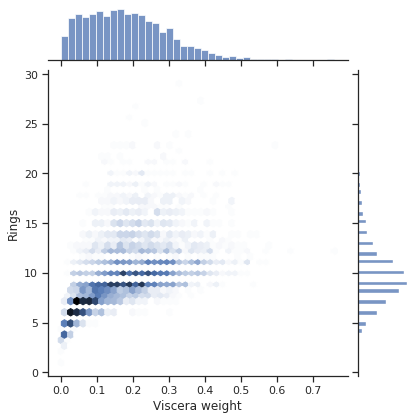

In [52]:
sns.jointplot(x='Viscera weight', y='Rings', data=data, kind="hex")

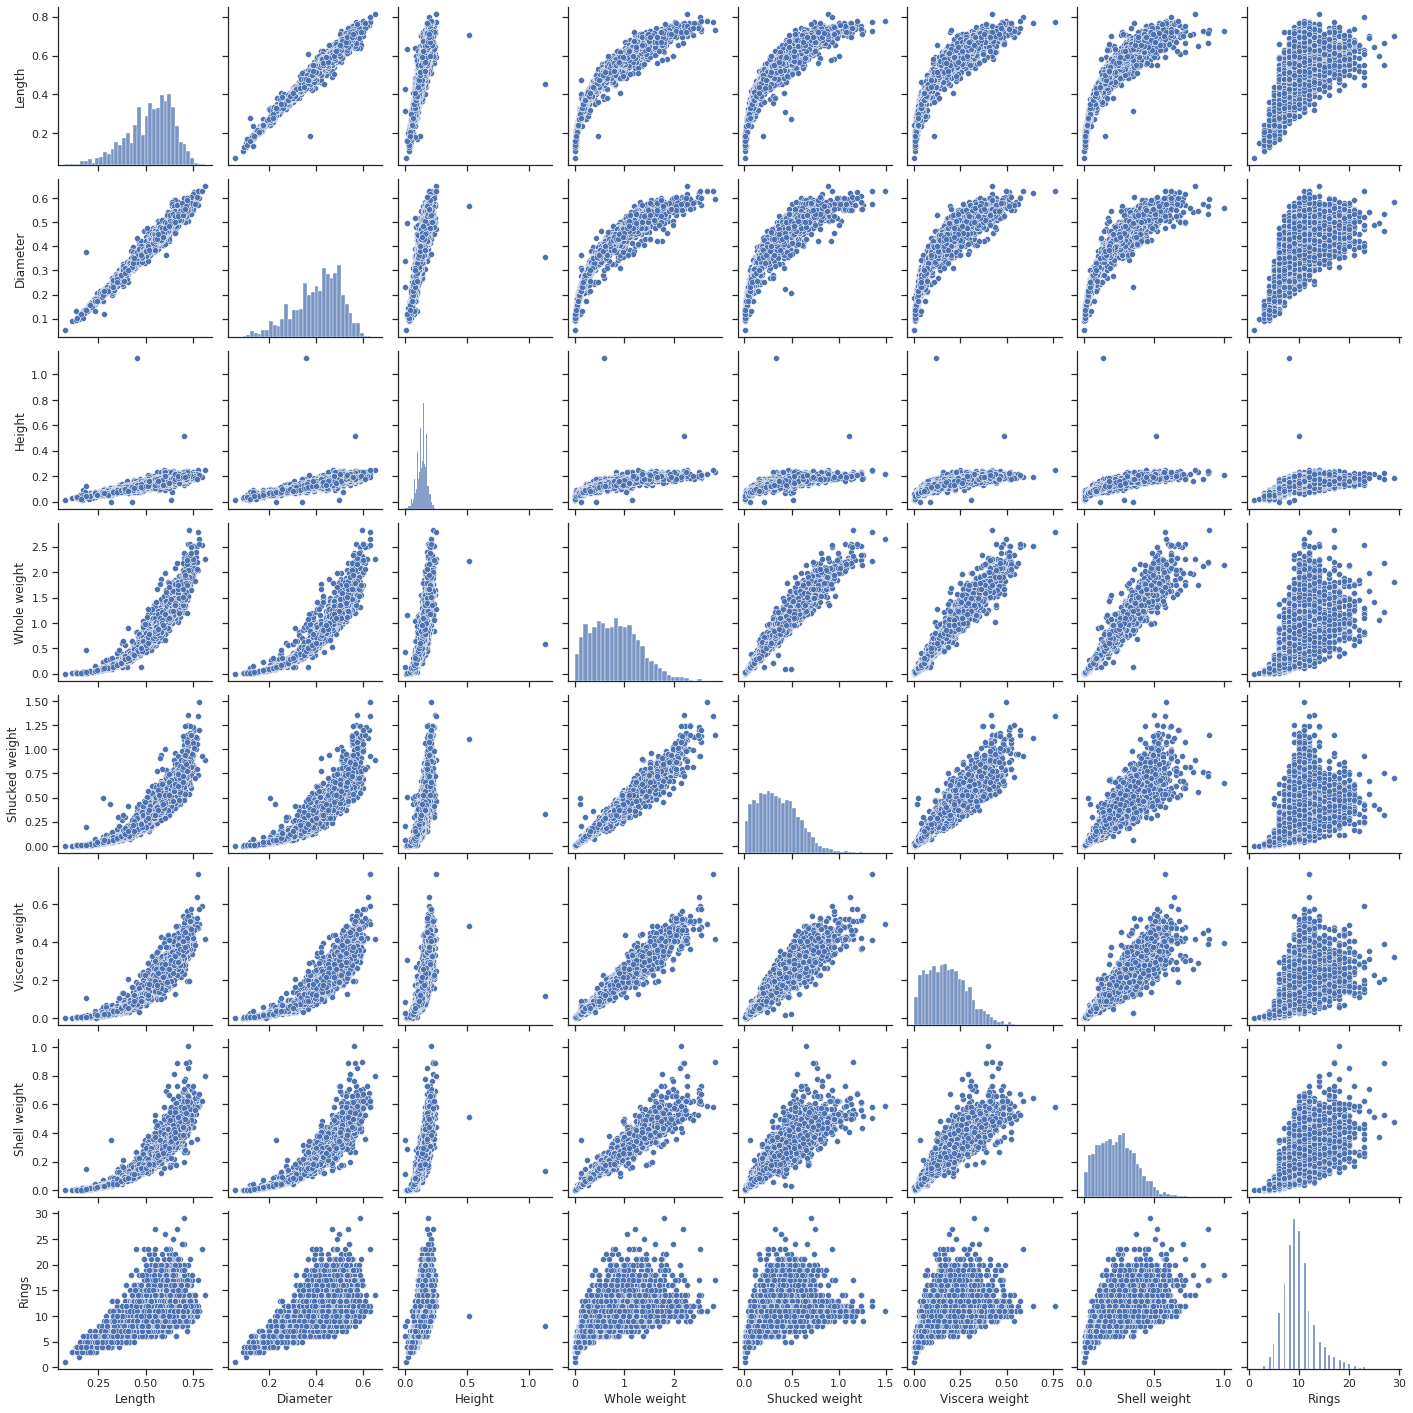

In [55]:
sns.pairplot(data)

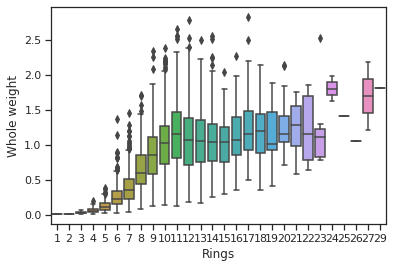

In [56]:
sns.boxplot(x='Rings', y='Whole weight', data=data)

### **4) Информация о корреляции признаков**

In [57]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:


*   Целевой признак наиболее сильно коррелирует с весом раковины особи (0.62)
*   Меньше всего целевой признак коррелирует с весом мяса особи (0.42), однако корреляция все равно достаточно сильная, поэтому не стоит убирать этот признак из модели
*   С остальными признаками целевой признак коррелирует примерно одинаково



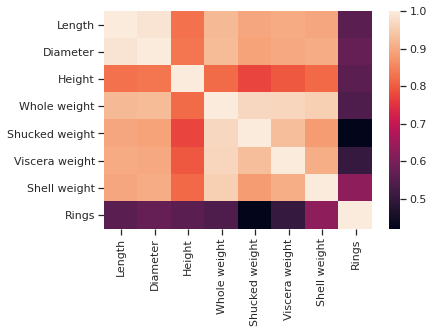

In [58]:
sns.heatmap(data.corr())